# Bài 1

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [2]:
zip_file_path= "iris.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")
    with zip_ref.open("iris.names") as iris_names_file:
        iris_names= iris_names_file.readlines()
    with zip_ref.open("iris.data") as iris_data_file:
        df_iris_data= pd.read_csv(iris_data_file,header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
    with zip_ref.open("bezdekIris.data") as bezdekIris_data_file:
        df_bezdekIris_data= pd.read_csv(bezdekIris_data_file, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [3]:
df_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Tìm hiểu dữ liệu**
- sepal length (cm): là độ dài của đài hoa
- sepal width (cm): là chiều rộng của đài hoa
- petal length (cm): là độ dài của cánh hoa
- petal width (cm): là chiều rộng của cánh hoa

In [5]:
df_iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df_iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 1. Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với 4 đặc trưng đầu 

In [7]:
df_iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

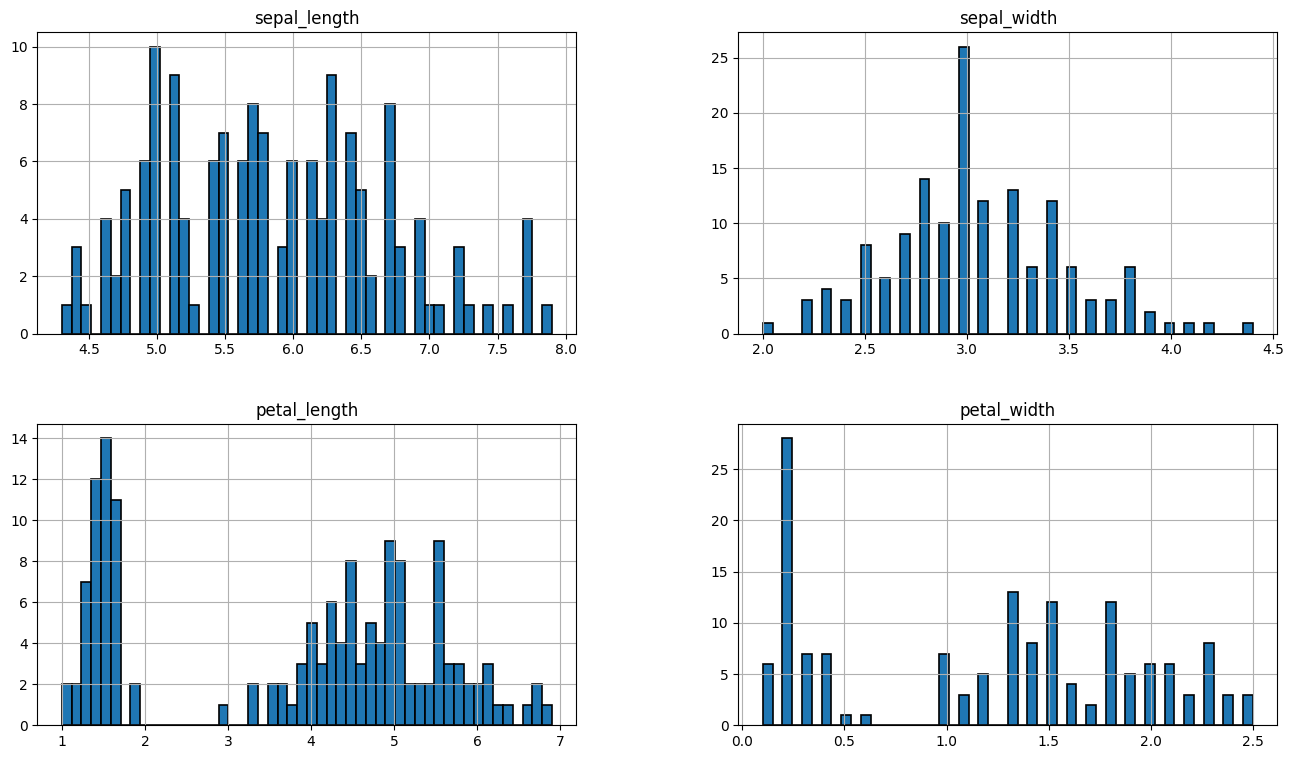

In [8]:
df_iris_data.hist(figsize=(16,9),edgecolor='black',linewidth=1.2, bins=50)

<Axes: >

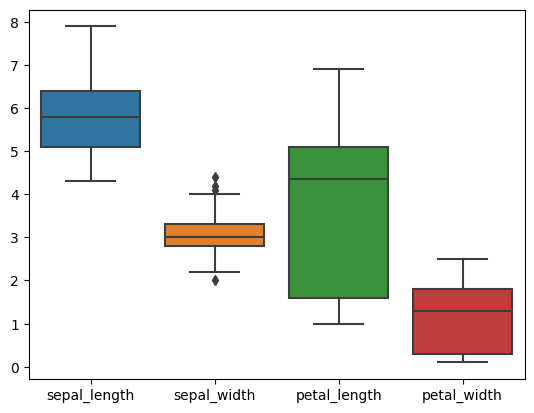

In [9]:
sns.boxplot(data=df_iris_data)

## 2.  Chuyển đổi các lớp thành số một cách tự động

In [10]:
label_encoder= preprocessing.LabelEncoder()
df_iris_data['class']= label_encoder.fit_transform(df_iris_data['class'])

In [11]:
df_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
# df_iris_data['class'] = label_encoder.inverse_transform(df_iris_data['class'])

## 3.  Sử dụng 4 đặc trưng của bộ dữ liệu, chia bộ dữ liệu thành 2 phần Train/Test với tỉ lệ 7:3, cho biết trong bộ dữ liệu đã cho có dữ liệu nào null không, phân tích bộ dữ  liệu theo từng lớp qua các biểu đồ.

In [16]:
column_feature=df_iris_data.columns
column_feature

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [17]:
X,y=df_iris_data[column_feature[:-1]],df_iris_data[column_feature[-1]]

In [56]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 118 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 14 to 58
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  45 non-null     float64
 1   sepal_width   45 non-null     float64
 2   petal_length  45 non-null     float64
 3   petal_width   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


- Bộ dữ liệu đã cho không có dữ liệu bị thiếu

**- Phân tích bộ dữ liệu theo từng lớp qua các biểu đồ**

d:\Seme\Year_4_Semester_1\DeepLearning\week1\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


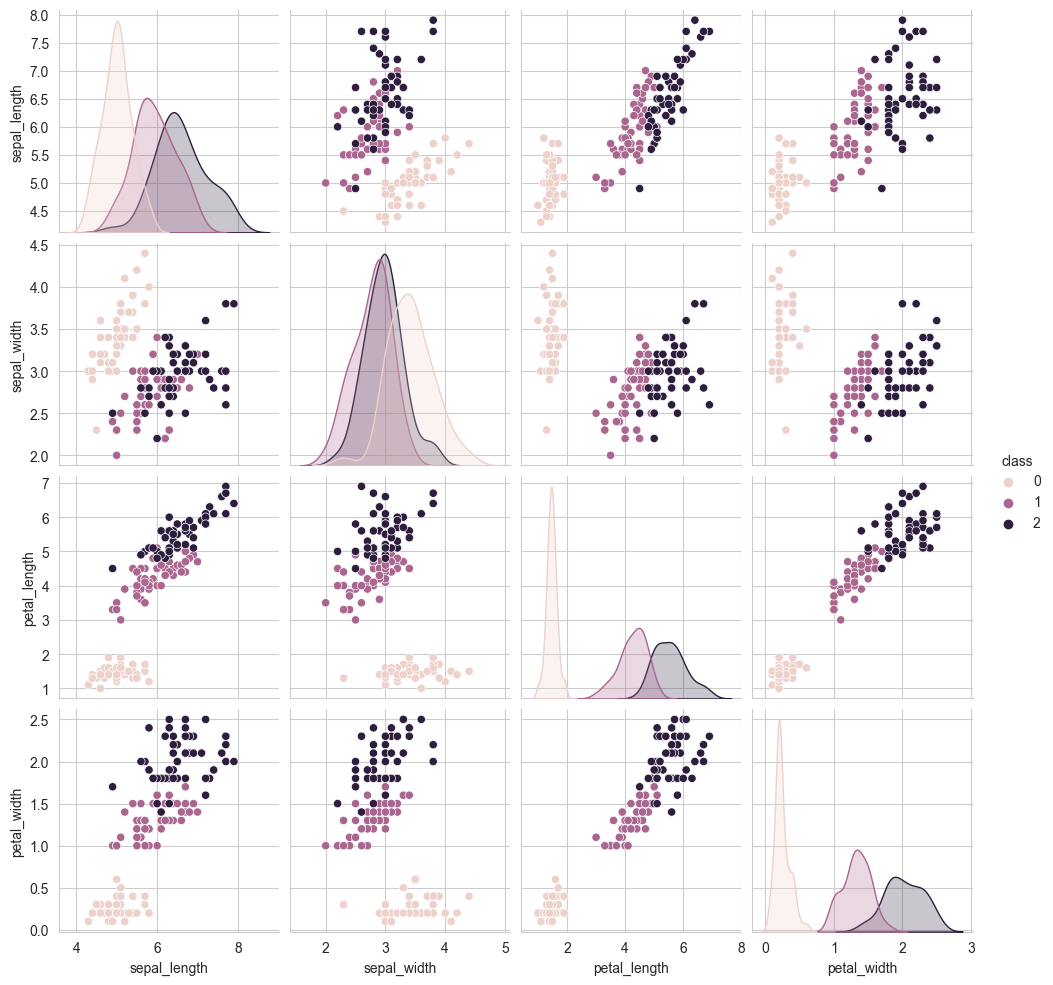

In [60]:
sns.pairplot(df_iris_data, hue='class')

## 4.Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 5-Fold (k-fold)

In [61]:
knn= KNeighborsClassifier(n_neighbors=3)
kf= KFold(n_splits=5, shuffle=True, random_state=1)
scores= cross_val_score(knn, X, y, cv=kf)

In [62]:
for i,score in enumerate(scores):
    print('Fold',i+1,':',score)

Fold 1 : 1.0
Fold 2 : 0.9666666666666667
Fold 3 : 0.9333333333333333
Fold 4 : 0.9333333333333333
Fold 5 : 0.9666666666666667


In [63]:
print("Average Score:", scores.mean())

Average Score: 0.9600000000000002


## 5,6,7,8.  Huấn luyện dữ liệu cho bài toán phân lớp sử dụng 4 đặc trưng trên với các giải thuật Bayes, SVM, Linear Regression và Decision Tree. Tính độ đo F1 score,Tính độ đo Accuracy, Tính độ đo Confusion Matrix.

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm= confusion_matrix(y_test, y_pred)
    return acc, f1, cm

**Bayes**

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
acc_by,f1_by,cm_by=train_and_evaluation(gnb, X_train, y_train, X_test, y_test)
acc_by,f1_by,cm_by

(0.9333333333333333,
 0.9343915343915343,
 array([[14,  0,  0],
        [ 0, 16,  2],
        [ 0,  1, 12]], dtype=int64))

**SVM**

In [66]:
from sklearn.svm import SVC
svm=SVC()
acc_svc,f1_svc,cm_svc=train_and_evaluation(svm, X_train, y_train, X_test, y_test)
acc_svc,f1_svc,cm_svc

(0.9777777777777777,
 0.9781305114638448,
 array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  0, 13]], dtype=int64))

**Linear Regression**

In [67]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()
acc_lr,f1_lr,cm_lr=train_and_evaluation(logistic_reg,X_train, y_train, X_test, y_test)
acc_lr,f1_lr,cm_lr

d:\Seme\Year_4_Semester_1\DeepLearning\week1\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9777777777777777,
 0.9781305114638448,
 array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  0, 13]], dtype=int64))

**Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
acc_dt,f1_dt,cm_dt=train_and_evaluation(d_tree, X_train, y_train, X_test, y_test)
acc_dt,f1_dt,cm_dt

(0.9555555555555556,
 0.9558404558404558,
 array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  1, 12]], dtype=int64))

## 9.  So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên

In [69]:
dict_eval = {
    'Accuracy': {
        'Bayes': acc_by,
        'SVM': acc_svc,
        'Logistic Regression': acc_lr,
        'Decision Tree': acc_dt
    },
    'F1 Score': {
        'Bayes': f1_by,
        'SVM': f1_svc,
        'Logistic Regression': f1_lr,
        'Decision Tree': f1_dt
    },
    'Confusion Matrix': {
        'Bayes': cm_by,
        'SVM': cm_svc,
        'Logistic Regression': cm_lr,
        'Decision Tree': cm_dt
    },
}

df_eval = pd.DataFrame(dict_eval)
df_eval.head()

,Accuracy,F1 Score,Confusion Matrix
Bayes,0.933333,0.934392,"[[14, 0, 0], [0, 16, 2], [0, 1, 12]]"
SVM,0.977778,0.978131,"[[14, 0, 0], [0, 17, 1], [0, 0, 13]]"
Logistic Regression,0.977778,0.978131,"[[14, 0, 0], [0, 17, 1], [0, 0, 13]]"
Decision Tree,0.955556,0.955840,"[[14, 0, 0], [0, 17, 1], [0, 1, 12]]"


In [75]:
name_model = df_eval.index
name_model

Index(['Bayes', 'SVM', 'Logistic Regression', 'Decision Tree'], dtype='object')

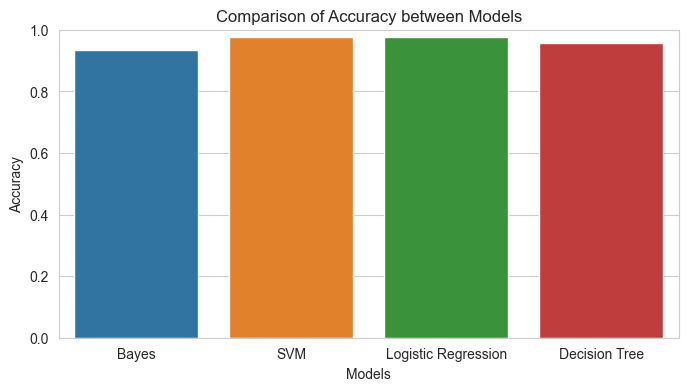

In [76]:
plt.figure(figsize=(8, 4))
sns.barplot(x=name_model, y=df_eval['Accuracy'])
plt.ylim(0, 1)  # Định giới hạn trục y trong khoảng từ 0 đến 1
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy between Models")
plt.show()

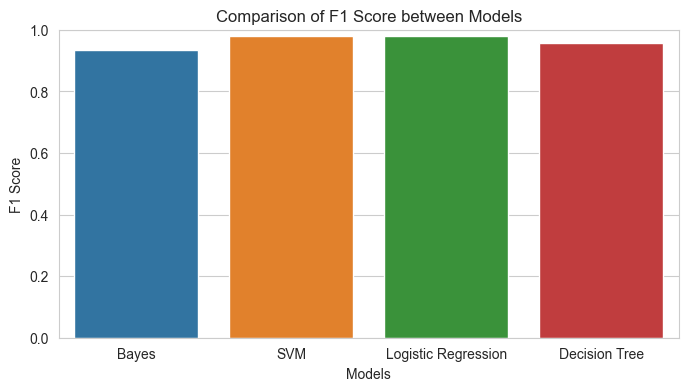

In [77]:
plt.figure(figsize=(8, 4))
sns.barplot(x=name_model, y=df_eval['F1 Score'])
plt.ylim(0, 1)  # Định giới hạn trục y trong khoảng từ 0 đến 1
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Score between Models")
plt.show()


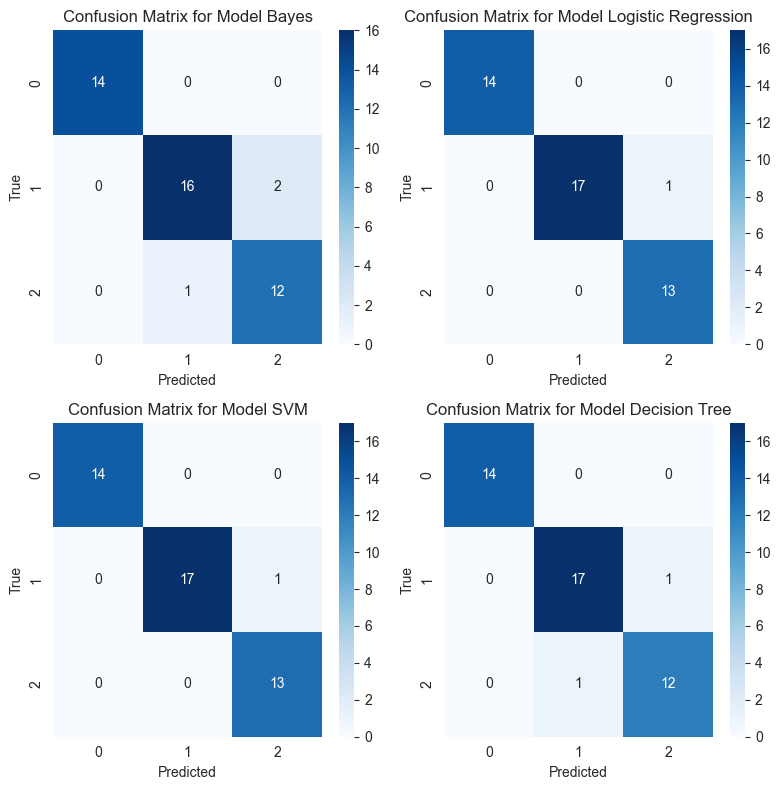

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, cm in enumerate(df_eval['Confusion Matrix']):
    ax = axes[i%2, i//2]
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)
    ax.set_title(f"Confusion Matrix for Model {name_model[i]}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

## 10. Lưu model với giải thuật đạt kết quả tốt nhất 

In [152]:
import joblib
# save the model to disk
joblib.dump(svm, 'model_svm.pkl')

['model_svm.pkl']

In [153]:
# load the model to disk
model_svm=joblib.load('model_svm.pkl')

In [168]:
x_s= X_train[0:1]
x_s

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0


In [178]:
x_s=[[6.1,2.8,4.7,1.2]]

In [184]:
y_predict=model_svm.predict(x_s)
label_encoder.inverse_transform(y_predict)[0]

d:\Seme\Year_4_Semester_1\DeepLearning\week1\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Iris-versicolor'

In [185]:
label_encoder.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [188]:
lable_path_image={
    "Iris-virginica": "images/Iris_virginica.jpg",
    "Iris-versicolor": "images/Iris_versicolor.jpg",
    "Iris-setosa": "images/Iris_setosa.jpg"
}

In [199]:
label_encoder.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [196]:
# sepal_length=input("Enter sepal length: ")
# sepal_width=input("Enter sepal width: ")
# petal_length=input("Enter petal length: ")
# petal_width=input("Enter petal width: ")
sepal_length,sepal_width,petal_length,petal_width=6.1,2.8,4.7,1.2
print("sepal length: ",sepal_length)
print("sepal width: ",sepal_width)
print("petal length: ",petal_length)
print("petal width: ",petal_width)
y_label=label_encoder.inverse_transform(model_svm.predict([[sepal_length,sepal_width,petal_length,petal_width]]))[0]

sepal length:  6.1
sepal width:  2.8
petal length:  4.7
petal width:  1.2


d:\Seme\Year_4_Semester_1\DeepLearning\week1\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


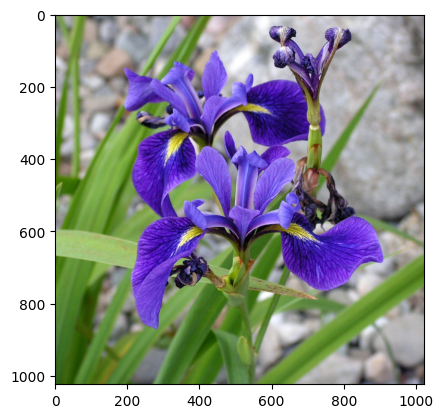

In [197]:
import cv2
path_image=lable_path_image[y_label]
#load image
image = cv2.imread(path_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#show image
plt.imshow(image)

## 11. Xây dựng ứng dụng với đầu vào là dữ liệu, có thể tự ngõ hay từ 1 file, in kết quả ra màn hình

Link: https://www.facebook.com/

# Bài 2

## 1. Hãy cho biết kiến trúc tổng quát của ChatGPT và từng thành phần cụ thể của các phần trong kiến trúc này.

Kiến trúc tổng quát của ChatGPT (Generative Pre-trained Transformer) bao gồm các thành phần chính sau:

1. Encoder-decoder architecture: Kiến trúc của ChatGPT dựa trên mô hình mã hóa - giải mã (encoder-decoder) sử dụng transformer.

2. Multi-head attention mechanism: Sử dụng multiple heads trong self-attention mechanism giúp mô hình có khả năng tập trung vào các phần khác nhau của input và xử lý thông tin song song.

3. Positional encoding: Để mô hình có khả năng nhận biết vị trí thông tin trong câu, positional encoding được sử dụng để bổ sung thông tin về vị trí cho các từ trong câu.

4. Transformer blocks: Một số lượng lớn các block transformer được xếp chồng lên nhau để tạo thành một mạng neural network sâu.

5. Input embedding layer: Các từ đầu vào được biểu diễn dưới dạng embeddings, thường là pre-trained word embeddings như Word2Vec hoặc GloVe.

6. Output linear layer: Tầng này ánh xạ đầu ra từ mạng transformer với độ dài tương ứng với kích thước của từ điển đầu ra.

7. Decoder self-attention: Trong giai đoạn giải mã, self-attention được sử dụng để giúp mô hình tạo ra các kết quả phù hợp với ngữ cảnh.

8. Beam search: Để tạo ra kết quả đa dạng hơn, phương pháp beam search được sử dụng để lựa chọn các kết quả ứng viên trong quá trình dự đoán đầu ra.


## 2. Những tiến bộ gần đây của Deep Learning và 40 bài báo về chủ đề ứng dụng deep learning trong phát hiện đối tượng trong ảnh (20 bài) và dịch máy (20 bài) có thời gian publish trong năm 2021-2022 và phân tích các phương pháp của từng bài báo